# Model训练脚本

- 作用：**读取训练数据**并**训练神经网络**保存到./model.h5

可尝试修改网络结构以获得更优结果

训练好后将model.h5保存到项目根目录（已有预先模型的模型）

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

In [2]:
import numpy as np
from keras.layers import Conv2D,Dense,Activation,Flatten,MaxPooling2D
from keras.models import Sequential
import pickle
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pickle,gzip

Using TensorFlow backend.


In [3]:
#don't change this
resize_ratio = 8
ban=[]

# Data pre-processing

下列三个cell对应功能：

- 处理原始图片并保存到data.pkl.gz
- 读取data.pkl.gz
- 测试

一般情况下执行第二个cell即可

In [4]:
f=gzip.open('data.pkl.gz')
X_train,y_train = pickle.load(f)
f.close()

# Build up model

In [5]:
## build Network
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Conv2D(
                        batch_input_shape=(None, 100,135, 1),
                        filters=32,
                        kernel_size=6,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

model.add(Conv2D(
                        filters=48,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

model.add(Conv2D(
                        filters=48,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))



model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

#model.add(Dense(16))
#model.add(Activation('relu'))

#model.add(Dense(8))
#model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('sigmoid'))

# We add metrics to get more results you want to see
model.compile(optimizer='nadam',
              loss='mse'
              )

# Train

In [17]:
print('Training ------------')
model.fit(X_train[:-10], y_train[:-10], epochs=32, batch_size=16)

Training ------------
Epoch 1/32
967/967 [==============================] - 39s 40ms/step - loss: 8.4219e-05
Epoch 2/32
967/967 [==============================] - 39s 40ms/step - loss: 6.9598e-05
Epoch 3/32
967/967 [==============================] - 39s 40ms/step - loss: 7.4117e-05
Epoch 4/32
967/967 [==============================] - 39s 40ms/step - loss: 7.2259e-05
Epoch 5/32
967/967 [==============================] - 39s 40ms/step - loss: 6.9399e-05
Epoch 6/32
967/967 [==============================] - 39s 40ms/step - loss: 7.3325e-05
Epoch 7/32
967/967 [==============================] - 39s 40ms/step - loss: 0.0322
Epoch 8/32
967/967 [==============================] - 39s 40ms/step - loss: 0.0174
Epoch 9/32
967/967 [==============================] - 39s 40ms/step - loss: 0.0175
Epoch 10/32
967/967 [==============================] - 39s 40ms/step - loss: 0.0174
Epoch 11/32
967/967 [==============================] - 39s 40ms/step - loss: 0.0174
Epoch 12/32
967/967 [==================

# Test

In [15]:
index=0
maxloss=-1
for i in range(len(X_train)):
    if i in ban:
        continue
    loss = model.test_on_batch(np.array([X_train[i]]), np.array([y_train[i]]))
    if loss > maxloss:
        maxloss=loss
        index=i
ban.append(index)

605


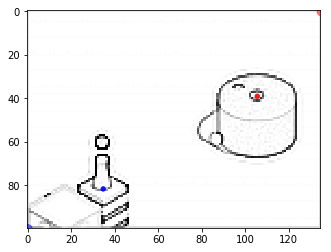

In [18]:
print index
pre=model.predict(X_train[index].reshape(1,100,135,1))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_patch(Circle(xy = (y_train[index][0]*1080/resize_ratio,y_train[index][1]*800/resize_ratio), radius=1, alpha=0.9, color='red'))
ax.add_patch(Circle(xy = (y_train[index][2]*1080/resize_ratio,y_train[index][3]*800/resize_ratio), radius=1, alpha=0.9, color='blue'))
ax.add_patch(Circle(xy = (pre[0][0]*1080/resize_ratio,pre[0][1]*800/resize_ratio), radius=2, alpha=0.5, color='red'))
ax.add_patch(Circle(xy = (pre[0][2]*1080/resize_ratio,pre[0][3]*800/resize_ratio), radius=2, alpha=0.5, color='blue'))
ax.imshow(X_train[index].reshape(100,135),cmap='gray')
plt.show()

In [9]:
model.save('model.h5')

In [10]:
loss = model.evaluate(X_train[-10:], y_train[-10:])
print('test loss: ', loss)

10/10 [==============================] - 0s 13ms/step
('test loss: ', 0.00036366566200740635)
